In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
from glob import glob

In [38]:
img_input = np.load('/home/jawor96/Documents/StudyICM/PracaMagisterska/RED_CNN/npy_img/L067_0_input.npy')
img_target = np.load('/home/jawor96/Documents/StudyICM/PracaMagisterska/RED_CNN/npy_img/L067_0_target.npy')

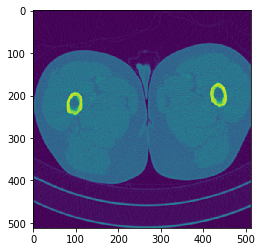

In [39]:
plt.imshow(img_input)

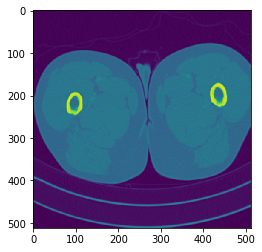

In [40]:
plt.imshow(img_target)

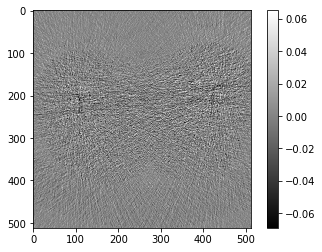

In [41]:
noise = img_input - img_target
plt.imshow(noise, cmap='gray')
plt.colorbar()

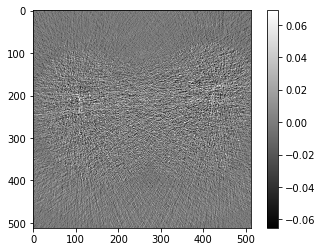

In [42]:
noise_rev = img_target - img_input
plt.imshow(noise_rev, cmap='gray')
plt.colorbar()

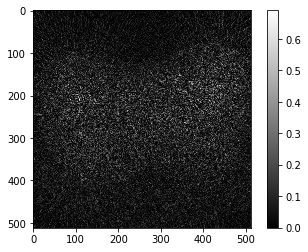

In [43]:
noise_abs = 10*np.abs(img_target - img_input)
plt.imshow(noise_abs, cmap='gray')
plt.colorbar()

In [44]:
noise.shape

(512, 512)

In [45]:
img_input_ID = np.load('/home/jawor96/Documents/StudyICM/PracaMagisterska/ImageDenoiser/TrainingDataset/0_input.npy')
img_target_ID = np.load('/home/jawor96/Documents/StudyICM/PracaMagisterska/ImageDenoiser/TrainingDataset/0_target.npy')

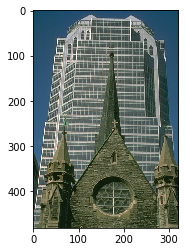

In [46]:
plt.imshow(img_target_ID)

In [47]:
img_target_ID.shape

(481, 321, 3)

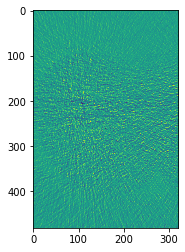

In [48]:
noise_sliced = noise[:-31, :-191]
plt.imshow(noise_sliced)

In [49]:
noise_sliced_3d = noise_sliced.reshape((noise_sliced.shape[0], noise_sliced.shape[1], 1))

In [50]:
noise_sliced_3d.shape

(481, 321, 1)

In [51]:
noise_sliced_3d_full = np.append(noise_sliced_3d, noise_sliced_3d, axis=2)
noise_sliced_3d_full = np.append(noise_sliced_3d, noise_sliced_3d_full, axis=2)
noise_sliced_3d_full.shape

(481, 321, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


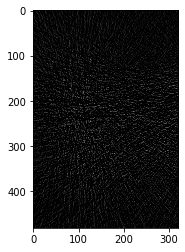

In [53]:
plt.imshow(10*noise_sliced_3d_full)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


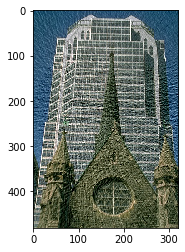

In [63]:
new_img_input = 10*noise_sliced_3d_full + img_target_ID
plt.imshow(new_img_input)

In [11]:
import os
from glob import glob
CT_data_path = '/home/jawor96/Documents/StudyICM/PracaMagisterska/RED_CNN/npy_img'
CT_imgs_noise = [np.load(f) for f in sorted(glob(os.path.join(CT_data_path, '*_input.npy')))]
CT_imgs_orgin = [np.load(f) for f in sorted(glob(os.path.join(CT_data_path, '*_target.npy')))]

In [19]:
noise = CT_imgs_orgin
for i in range(len(CT_imgs_noise)):
    noise[i] = CT_imgs_noise[i] - CT_imgs_orgin[i]
    

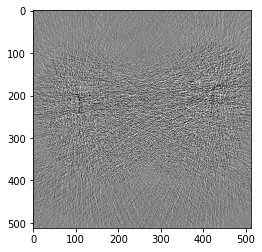

In [20]:
plt.imshow(noise[0], cmap='gray')

In [3]:
CT_data_path = '/home/jawor96/Documents/StudyICM/PracaMagisterska/RED_CNN/npy_img'
ID_data_path = '/home/jawor96/Documents/StudyICM/PracaMagisterska/ImageDenoiser/TrainingDataset'
save_data_path = '/home/jawor96/Documents/StudyICM/PracaMagisterska/ImageDenoiser/TrainingDataset_CTnoise'

def CT_noise_simulator(CT_data_path, ID_data_path, save_data_path):
    CT_imgs_noise = [np.load(f) for f in sorted(glob(os.path.join(CT_data_path, '*_input.npy')))]
    CT_imgs_orgin = [np.load(f) for f in sorted(glob(os.path.join(CT_data_path, '*_target.npy')))]
    ID_imgs_orgin = [np.load(f) for f in sorted(glob(os.path.join(ID_data_path, '*_target.npy')))]
    for i in range(len(ID_imgs_orgin)):
        noise_img = CT_imgs_noise[i] - CT_imgs_orgin[i]
        x = noise_img.shape[0] - ID_imgs_orgin[i].shape[0]
        y = noise_img.shape[1] - ID_imgs_orgin[i].shape[1]
        noise_img_sliced = noise_img[:-x, :-y]
        noise_img_sliced_3d = noise_img_sliced.reshape((noise_img_sliced.shape[0], noise_img_sliced.shape[1], 1))
        noise_img_sliced_3d_full = np.append(noise_img_sliced_3d, noise_img_sliced_3d, axis=2)
        noise_img_sliced_3d_full = np.append(noise_img_sliced_3d, noise_img_sliced_3d_full, axis=2)
        new_img_input = 7*noise_img_sliced_3d_full + ID_imgs_orgin[i]
        f_in_name = '{}_{}.npy'.format(i, 'input')
        f_target_name = '{}_{}.npy'.format(i, 'target')
        np.save(os.path.join(save_data_path, f_in_name), new_img_input)
        np.save(os.path.join(save_data_path, f_target_name), ID_imgs_orgin[i])
        

In [4]:
CT_noise_simulator(CT_data_path, ID_data_path, save_data_path)

In [67]:
img_input_test = np.load('/home/jawor96/Documents/StudyICM/PracaMagisterska/ImageDenoiser/TrainingDataset_CTnoise/0_input.npy')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


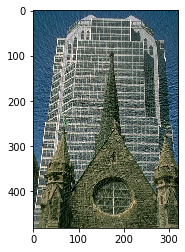

In [68]:
plt.imshow(img_input_test)

In [69]:
img_input_test.shape

(481, 321, 3)

In [70]:
img_input_test

array([[[ 0.04322821,  0.15695371,  0.14911057],
        [ 0.02050781,  0.11070389,  0.11070389],
        [-0.01045209,  0.12288125,  0.13072439],
        ...,
        [ 0.14286918,  0.17032017,  0.10757506],
        [ 0.096223  ,  0.12367399,  0.06092888],
        [ 0.04495347,  0.08416916, -0.00994849]],

       [[ 0.00170898,  0.10759135,  0.12719919],
        [ 0.10466069,  0.23407246,  0.26152346],
        [ 0.11030753,  0.24364087,  0.28285655],
        ...,
        [ 0.05580193,  0.13423331,  0.12639017],
        [ 0.01568628,  0.09411766,  0.08627451],
        [ 0.02162224,  0.08436735,  0.04123009]],

       [[ 0.05571098,  0.19688746,  0.25963256],
        [ 0.15434475,  0.29159966,  0.36610946],
        [ 0.13604952,  0.28506914,  0.36742207],
        ...,
        [ 0.09330864,  0.23840669,  0.30115178],
        [ 0.01548809,  0.16058613,  0.22333124],
        [ 0.01890606,  0.11694528,  0.13655312]],

       ...,

       [[ 0.56058615,  0.5919587 ,  0.54882145],
        [ 0

In [5]:
CT_data_path = '/home/jawor96/Documents/StudyICM/PracaMagisterska/RED_CNN/npy_img'
ID_data_path = '/home/jawor96/Documents/StudyICM/PracaMagisterska/ImageDenoiser/TestDataset'
save_data_path = '/home/jawor96/Documents/StudyICM/PracaMagisterska/ImageDenoiser/TestDataset_CTnoise'
def CT_noise_simulator(CT_data_path, ID_data_path, save_data_path):
    CT_imgs_noise = [np.load(f) for f in sorted(glob(os.path.join(CT_data_path, '*_input.npy')))]
    CT_imgs_orgin = [np.load(f) for f in sorted(glob(os.path.join(CT_data_path, '*_target.npy')))]
    ID_imgs_orgin = [np.load(f) for f in sorted(glob(os.path.join(ID_data_path, '*_target.npy')))]
    for i in range(len(ID_imgs_orgin)):
        noise_img = CT_imgs_noise[i + 200] - CT_imgs_orgin[i + 200]
        x = noise_img.shape[0] - ID_imgs_orgin[i].shape[0]
        y = noise_img.shape[1] - ID_imgs_orgin[i].shape[1]
        noise_img_sliced = noise_img[:-x, :-y]
        noise_img_sliced_3d = noise_img_sliced.reshape((noise_img_sliced.shape[0], noise_img_sliced.shape[1], 1))
        noise_img_sliced_3d_full = np.append(noise_img_sliced_3d, noise_img_sliced_3d, axis=2)
        noise_img_sliced_3d_full = np.append(noise_img_sliced_3d, noise_img_sliced_3d_full, axis=2)
        new_img_input = 7*noise_img_sliced_3d_full + ID_imgs_orgin[i]
        f_in_name = '{}_{}.npy'.format(i, 'input')
        f_target_name = '{}_{}.npy'.format(i, 'target')
        np.save(os.path.join(save_data_path, f_in_name), new_img_input)
        np.save(os.path.join(save_data_path, f_target_name), ID_imgs_orgin[i])
        

In [6]:
CT_noise_simulator(CT_data_path, ID_data_path, save_data_path)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


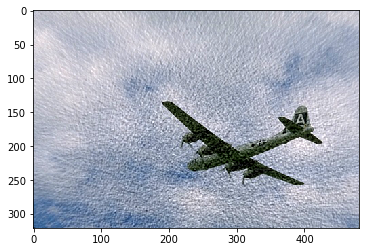

In [73]:
img_input_test = np.load('/home/jawor96/Documents/StudyICM/PracaMagisterska/ImageDenoiser/TestDataset_CTnoise/0_input.npy')
plt.imshow(img_input_test)

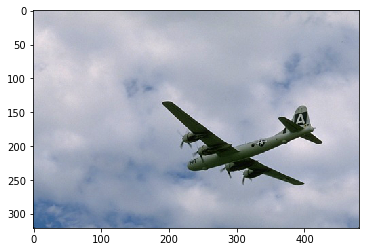

In [74]:
img_target_test = np.load('/home/jawor96/Documents/StudyICM/PracaMagisterska/ImageDenoiser/TestDataset_CTnoise/0_target.npy')
plt.imshow(img_target_test)

In [11]:
img_input_test = np.load('/home/jawor96/Documents/StudyICM/PracaMagisterska/ImageDenoiser/TrainingDataset_CTnoise/23_input.npy')
img_target_test = np.load('/home/jawor96/Documents/StudyICM/PracaMagisterska/ImageDenoiser/TrainingDataset_CTnoise/23_target.npy')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


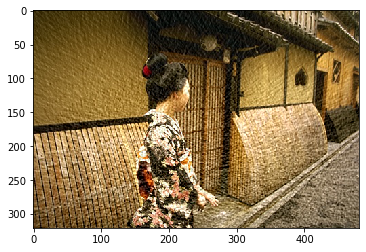

In [12]:
plt.imshow(img_input_test)

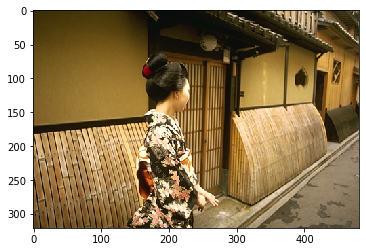

In [13]:
plt.imshow(img_target_test)

In [83]:
sorted(os.listdir('/home/jawor96/Documents/StudyICM/PracaMagisterska/ImageDenoiser/TestDataset_CTnoise/'))

['0_target.npy',
 '10_target.npy',
 '11_target.npy',
 '12_target.npy',
 '13_target.npy',
 '14_target.npy',
 '15_target.npy',
 '16_target.npy',
 '17_target.npy',
 '18_target.npy',
 '19_target.npy',
 '1_target.npy',
 '20_target.npy',
 '21_target.npy',
 '22_target.npy',
 '23_target.npy',
 '24_target.npy',
 '25_target.npy',
 '26_target.npy',
 '27_target.npy',
 '28_target.npy',
 '29_target.npy',
 '2_target.npy',
 '30_target.npy',
 '31_target.npy',
 '32_target.npy',
 '33_target.npy',
 '34_target.npy',
 '35_target.npy',
 '36_target.npy',
 '37_target.npy',
 '38_target.npy',
 '39_target.npy',
 '3_target.npy',
 '40_target.npy',
 '41_target.npy',
 '42_target.npy',
 '43_target.npy',
 '44_target.npy',
 '45_target.npy',
 '46_target.npy',
 '47_target.npy',
 '48_target.npy',
 '49_target.npy',
 '4_target.npy',
 '50_target.npy',
 '51_target.npy',
 '52_target.npy',
 '53_target.npy',
 '54_target.npy',
 '55_target.npy',
 '56_target.npy',
 '57_target.npy',
 '58_target.npy',
 '59_target.npy',
 '5_target.npy'